In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
glass = pd.read_csv("glass_csv.csv", sep=",")

In [4]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,'vehic wind float'
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,'build wind non-float'
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,'build wind non-float'
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,'build wind non-float'


In [6]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [7]:
x = glass.drop(columns=['Type'])

In [8]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24
...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00


In [9]:
y = glass[['Type']]

In [10]:
y

,Type
0,'build wind float'
1,'vehic wind float'
2,'build wind float'
3,tableware
4,'build wind non-float'
...,...
209,'vehic wind float'
210,'build wind non-float'
211,'build wind non-float'
212,'build wind non-float'


In [13]:
x.describe()

# Mean != 0 and sd != 1

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [14]:
scaler = StandardScaler()
x_scaled_arr = scaler.fit_transform(x)

In [15]:
x_scaled_arr

array([[-0.14371454, -0.75838406,  0.56667696, ..., -0.13168009,
        -0.35287683, -0.5864509 ],
       [-0.63880327, -1.53168114,  0.58057517, ..., -0.30071507,
        -0.35287683, -0.5864509 ],
       [-0.14371454, -0.24285268,  0.55277874, ..., -0.37114631,
        -0.35287683, -0.5864509 ],
       ...,
       [-0.73782101,  0.62864085,  0.58057517, ..., -0.7162594 ,
        -0.35287683,  0.85371869],
       [-0.48697606, -0.90567874,  0.13583231, ..., -0.29367195,
        -0.35287683, -0.5864509 ],
       [ 0.05102036,  0.83730832, -0.34365608, ...,  0.25569174,
        -0.35287683, -0.5864509 ]])

In [16]:
x_scaled_df = pd.DataFrame(x_scaled_arr)

In [17]:
x_scaled_df

,0,1,2,3,4,5,6,7,8
0,-0.143715,-0.758384,0.566677,-0.652289,0.490551,0.219689,-0.131680,-0.352877,-0.586451
1,-0.638803,-1.531681,0.580575,-0.190536,0.309376,0.112107,-0.300715,-0.352877,-0.586451
2,-0.143715,-0.242853,0.552779,-0.070079,-0.014151,0.142844,-0.371146,-0.352877,-0.586451
3,-1.774207,1.217820,-0.656366,0.190912,2.457593,-0.763919,-0.962769,-0.352877,-0.586451
4,5.137232,-1.359837,-1.865511,-0.893204,-3.223534,-0.579492,5.094318,-0.352877,1.882411
...,...,...,...,...,...,...,...,...,...
209,-0.747723,0.014913,0.497186,-0.451527,0.050555,0.142844,-0.448621,-0.352877,-0.586451
210,-0.807133,-0.672462,0.580575,1.355332,0.011732,0.296533,-0.695130,-0.352877,-0.586451
211,-0.737821,0.628641,0.580575,-0.391299,0.296435,-0.195271,-0.716259,-0.352877,0.853719
212,-0.486976,-0.905679,0.135832,0.532207,0.723490,0.358008,-0.293672,-0.352877,-0.586451


In [19]:
x_scaled_df.describe()

# Here check mean and sd values for all column
# mean ~ 0 and sd ~ 1

,0,1,2,3,4,5,6,7,8
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02
mean,-2.876301e-14,2.201769e-15,2.233416e-16,-3.130933e-16,9.635335e-16,-1.867665e-17,-3.265820e-16,-4.617283e-17,-3.320293e-17
std,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00,1.002345e+00
min,-2.381516e+00,-3.286943e+00,-1.865511e+00,-2.318616e+00,-3.676472e+00,-7.639186e-01,-2.484084e+00,-3.528768e-01,-5.864509e-01
25%,-6.082728e-01,-6.141580e-01,-3.957744e-01,-5.117560e-01,-4.800288e-01,-5.756501e-01,-5.049657e-01,-3.528768e-01,-5.864509e-01
50%,-2.262293e-01,-1.323817e-01,5.527787e-01,-1.704602e-01,1.799655e-01,8.905322e-02,-2.514132e-01,-3.528768e-01,-5.864509e-01
75%,2.614331e-01,5.120326e-01,6.361680e-01,3.715977e-01,5.649621e-01,1.735820e-01,1.518057e-01,-3.528768e-01,4.422417e-01
max,5.137232e+00,4.875637e+00,1.254639e+00,4.125851e+00,3.570524e+00,8.780145e+00,5.094318e+00,5.997210e+00,4.659881e+00


In [20]:
# Now calculate the covarience matrix for the above data

sigma = (x_scaled_df.T @ x_scaled_df) / (x_scaled_df.shape[0] - 1)

In [21]:
sigma

,0,1,2,3,4,5,6,7,8
0,1.004695,-0.192786,-0.122848,-0.409238,-0.544597,-0.291193,0.814207,-0.000388,0.143681
1,-0.192786,1.004695,-0.275017,0.157530,-0.070137,-0.267336,-0.276736,0.328136,-0.242479
2,-0.122848,-0.275017,1.004695,-0.484060,-0.166706,0.005421,-0.445833,-0.494573,0.083449
3,-0.409238,0.157530,-0.484060,1.004695,-0.005550,0.327489,-0.260811,0.481655,-0.074751
4,-0.544597,-0.070137,-0.166706,-0.005550,1.004695,-0.194239,-0.209712,-0.102631,-0.094643
5,-0.291193,-0.267336,0.005421,0.327489,-0.194239,1.004695,-0.319328,-0.042818,-0.007755
6,0.814207,-0.276736,-0.445833,-0.260811,-0.209712,-0.319328,1.004695,-0.113371,0.125555
7,-0.000388,0.328136,-0.494573,0.481655,-0.102631,-0.042818,-0.113371,1.004695,-0.058967
8,0.143681,-0.242479,0.083449,-0.074751,-0.094643,-0.007755,0.125555,-0.058967,1.004695


In [22]:
eigen_values, eigen_vectors = np.linalg.eig(sigma)

In [23]:
eigen_values

array([2.52295323e+00, 2.05969694e+00, 1.41143951e+00, 1.16329842e+00,
       9.18293337e-01, 5.30112353e-01, 3.70690643e-01, 6.41527269e-02,
       1.61637096e-03])

In [24]:
eigen_vectors

array([[-0.54517662,  0.28568318,  0.08691083, -0.14738099,  0.0735427 ,
        -0.11528772, -0.08186724, -0.7522159 ,  0.02573194],
       [ 0.2581256 ,  0.27035007, -0.38491962, -0.49124204, -0.1536833 ,
         0.55811757, -0.14858006, -0.12769315, -0.31193718],
       [-0.11088095, -0.59355826,  0.00841796, -0.37878577, -0.12350912,
        -0.30818598,  0.20604537, -0.07689061, -0.57727335],
       [ 0.42870863,  0.29521154,  0.32923712,  0.13750592, -0.01410888,
         0.01885731,  0.69923557, -0.27444105, -0.19222686],
       [ 0.22883635, -0.15509891, -0.45870884,  0.65253771, -0.00850012,
        -0.08609797, -0.21606658, -0.37992298, -0.29807321],
       [ 0.21934405, -0.15397013,  0.66257412,  0.03853544,  0.30703984,
         0.24363237, -0.50412141, -0.10981168, -0.26050863],
       [-0.49230609,  0.3453798 , -0.00098473,  0.27644322,  0.18818774,
         0.14866937,  0.09913463,  0.39870468, -0.57932321],
       [ 0.25037512,  0.48470218,  0.07405473, -0.13317545, -0

In [28]:
# The highest eigen value is the first one

# Performing rotation of data to get transformed values by multiplying the eigen vector with the scaled dataset

pc1_data = x_scaled_df @ eigen_vectors[:,0]

In [29]:
pc1_data

0     -0.213979
1      0.070901
2      0.155774
3      2.325668
4     -7.138698
         ...   
209    0.447183
210    1.213698
211    0.462998
212    0.654109
213    0.144390
Length: 214, dtype: float64

In [30]:
# Via Library

In [31]:
pca = PCA()

In [32]:
pca.fit_transform(x_scaled_df)

array([[ 0.2139788 , -1.06505169, -0.20284003, ...,  0.27732215,
         0.03578937, -0.01748231],
       [-0.07090076, -1.30120252,  0.21592376, ..., -0.28046676,
         0.39240633,  0.29416912],
       [-0.15577398, -0.73814955, -0.02887812, ..., -0.17436729,
        -0.08404443,  0.02699583],
       ...,
       [-0.46299775, -0.98824729, -0.47798843, ...,  0.16240227,
         0.09568527, -0.04013187],
       [-0.65410948, -0.71090274,  0.19533232, ..., -0.37601429,
        -0.14741697,  0.02903383],
       [-0.14438995,  0.63984928, -0.88925237, ..., -0.67504995,
        -0.10252573, -0.02242185]])

In [33]:
pd.DataFrame(pca.fit_transform(x_scaled_df))

# By default, the PCA library also tries to develop PCA for all the columns inside the dataset because we have
# not provided the n_components parameter

,0,1,2,3,4,5,6,7,8
0,0.213979,-1.065052,-0.202840,-0.293377,-0.684514,0.512547,0.277322,0.035789,-0.017482
1,-0.070901,-1.301203,0.215924,-0.635351,-0.695413,0.918377,-0.280467,0.392406,0.294169
2,-0.155774,-0.738150,-0.028878,0.273049,-0.534419,0.220427,-0.174367,-0.084044,0.026996
3,-2.325668,-0.462400,-2.391103,-1.158019,0.075073,-0.638654,0.111413,-0.098116,0.019439
4,7.138698,4.004437,2.259141,-0.258043,-0.082809,-0.790024,-0.251552,-0.064408,0.007874
...,...,...,...,...,...,...,...,...,...
209,-0.447183,-0.957422,-0.336252,0.321243,-0.447503,0.014077,0.114321,0.390872,0.062059
210,-1.213698,-0.779098,0.638638,-0.154491,-0.514108,0.378353,-1.179749,-0.079365,-0.006173
211,-0.462998,-0.988247,-0.477988,0.242119,1.071157,-0.509439,0.162402,0.095685,-0.040132
212,-0.654109,-0.710903,0.195332,-0.854948,-0.728413,0.410503,-0.376014,-0.147417,0.029034


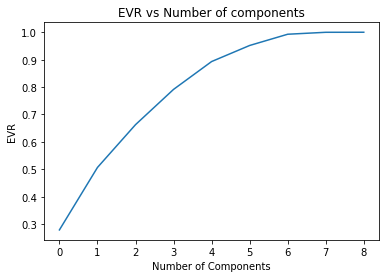

In [35]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('EVR') #for each component
plt.title('EVR vs Number of components')
plt.show()

In [36]:
# We can see that if we keep around 5 columns I can retail 95% of relation and 
# if we keep 6 columns we can keep 99% of relation

In [37]:
pca.explained_variance_ratio_

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [38]:
# Now developing the new model using 5 variables

In [52]:
pca_reduced = PCA(n_components=5)

In [53]:
new_data = pca_reduced.fit_transform(x_scaled_df)

In [54]:
new_data

array([[ 0.2139788 , -1.06505169, -0.20284003, -0.29337711, -0.68451445],
       [-0.07090076, -1.30120252,  0.21592376, -0.63535139, -0.69541349],
       [-0.15577398, -0.73814955, -0.02887812,  0.27304856, -0.53441926],
       ...,
       [-0.46299775, -0.98824729, -0.47798843,  0.2421185 ,  1.07115717],
       [-0.65410948, -0.71090274,  0.19533232, -0.85494807, -0.72841292],
       [-0.14438995,  0.63984928, -0.88925237,  0.26012132, -0.32559534]])

In [55]:
new_data = pd.DataFrame(new_data, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])

In [56]:
new_data

,PC1,PC2,PC3,PC4,PC5
0,0.213979,-1.065052,-0.202840,-0.293377,-0.684514
1,-0.070901,-1.301203,0.215924,-0.635351,-0.695413
2,-0.155774,-0.738150,-0.028878,0.273049,-0.534419
3,-2.325668,-0.462400,-2.391103,-1.158019,0.075073
4,7.138698,4.004437,2.259141,-0.258043,-0.082809
...,...,...,...,...,...
209,-0.447183,-0.957422,-0.336252,0.321243,-0.447503
210,-1.213698,-0.779098,0.638638,-0.154491,-0.514108
211,-0.462998,-0.988247,-0.477988,0.242119,1.071157
212,-0.654109,-0.710903,0.195332,-0.854948,-0.728413


In [57]:
new_x = new_data

In [58]:
new_x

,PC1,PC2,PC3,PC4,PC5
0,0.213979,-1.065052,-0.202840,-0.293377,-0.684514
1,-0.070901,-1.301203,0.215924,-0.635351,-0.695413
2,-0.155774,-0.738150,-0.028878,0.273049,-0.534419
3,-2.325668,-0.462400,-2.391103,-1.158019,0.075073
4,7.138698,4.004437,2.259141,-0.258043,-0.082809
...,...,...,...,...,...
209,-0.447183,-0.957422,-0.336252,0.321243,-0.447503
210,-1.213698,-0.779098,0.638638,-0.154491,-0.514108
211,-0.462998,-0.988247,-0.477988,0.242119,1.071157
212,-0.654109,-0.710903,0.195332,-0.854948,-0.728413


In [59]:
new_y = glass[['Type']]

In [60]:
new_y

,Type
0,'build wind float'
1,'vehic wind float'
2,'build wind float'
3,tableware
4,'build wind non-float'
...,...
209,'vehic wind float'
210,'build wind non-float'
211,'build wind non-float'
212,'build wind non-float'


In [ ]:
# Now building a classifier based on the new data

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [65]:
dt_model = DecisionTreeClassifier()
dt_model.fit(new_x, new_y)

DecisionTreeClassifier()

In [66]:
x

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24
...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00


In [64]:
# Now the end user does not know whether we have implemented PCA and they will provide the entire row with all columns as input
# So we need to pass the input data through StandardScaler and then through also through PCA and them make the decison

In [68]:
input_sample = scaler.transform([[1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00]])
input_sample

array([[-0.14371454, -0.75838406,  0.56667696, -0.65228949,  0.49055099,
         0.21968855, -0.13168009, -0.35287683, -0.5864509 ]])

In [69]:
input_sample = pca_reduced.transform(input_sample)
input_sample

array([[ 0.2139788 , -1.06505169, -0.20284003, -0.29337711, -0.68451445]])

In [70]:
dt_model.predict(input_sample)

array(["'build wind float'"], dtype=object)